In [1]:
import pandas as pd
import numpy as np
from random import sample, seed

from matplotlib import pyplot as plt
import seaborn as sns

# Create Interactions File
1. Initially selected download interactions.
2. Identified the top 8000 most installed applications.
3. Retained interactions related to these top applications.
4. Filtered for users with more than 32 interactions.
5. Randomly sampled 10,000 users from the filtered group for the final dataset.

In [2]:
df = pd.read_csv('raw_myket_input.csv', sep='\t', index_col=False)

In [3]:
df.shape

(53632867, 4)

In [4]:
df.head(1)

,app_name,user_id,datetime,is_update
0,com.cocoplay.erpetvet,392863962,2020-06-17 23:55:17.460,0


In [5]:
df_install = df[df['is_update'] == 0]

In [6]:
df_install.shape

(36615586, 4)

In [7]:
df_igb_user =df_install.groupby('user_id').count()


In [8]:
df_igb_app =df_install.groupby('app_name').count()

In [9]:
df_igb_user.shape

(1295520, 3)

In [10]:
top_apps = df_igb_app.sort_values('user_id', ascending=False).head(8000).index

In [11]:
df_if = df_install[df_install['app_name'].isin(top_apps)]

In [12]:
df_if.shape[0] / df.shape[0]

0.5569723692004009

In [13]:
df_if_gb_user = df_if.groupby('user_id').count()

In [14]:
top_users = df_if_gb_user[df_if_gb_user['app_name'] > 32].index

In [15]:
df_iff = df_if[df_if['user_id'].isin(top_users)]

In [16]:
len(top_users)

280391

In [17]:
df_iff.shape[0] / df.shape[0]

0.36765345772024455

In [18]:
seed(42)
sample_users = sample(list(top_users), 10000)

In [19]:
len(set(sample_users))

10000

In [20]:
df_sample = df_iff[df_iff['user_id'].isin(sample_users)]

In [21]:
df_sample.shape

(694121, 4)

In [22]:
df_sample.groupby('app_name').count().shape

(7988, 3)

## Create Timestamp based on datetime

In [23]:
df_sample['datetime'] = pd.to_datetime(df_sample['datetime'])

/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_20090/1389366755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['datetime'] = pd.to_datetime(df_sample['datetime'])


In [24]:
min_time = df_sample['datetime'].min()

In [25]:
df_sample['timestamp'] = df_sample['datetime'].apply(lambda x: (x - min_time).total_seconds())

/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_20090/4151269595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['timestamp'] = df_sample['datetime'].apply(lambda x: (x - min_time).total_seconds())


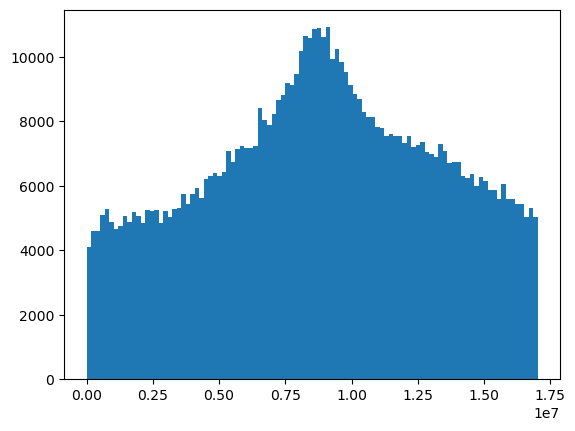

In [26]:
# plot histogram of timestamps
plt.hist(df_sample['timestamp'], bins=100)
plt.show()

In [27]:
df_sample['is_update2'] = 0
df_sample['is_update3'] = 0

/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_20090/3304871164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['is_update2'] = 0
/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_20090/3304871164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['is_update3'] = 0


In [28]:
df_sample[['user_id', 'app_name', 'timestamp', 'is_update', 'is_update2', 'is_update3']].to_csv('myket.csv', index=False)

In [29]:
df_sample.head(2)

,app_name,user_id,datetime,is_update,timestamp,is_update2,is_update3
97,com.tencent.ig,-1185417981,2020-06-17 23:56:04.440,0,0.000,0,0
546,com.tencent.iglite,-562407438,2020-06-17 23:59:44.787,0,220.347,0,0


# Create Interactions File with integer identifiers

In [30]:
app_names = df_sample['app_name'].unique()
app_names.sort()
app_names_mapping = {app_name: i for i, app_name in enumerate(app_names)}
df_sample['app_name_id'] = df_sample['app_name'].map(app_names_mapping)

/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_20090/4079327224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['app_name_id'] = df_sample['app_name'].map(app_names_mapping)


In [31]:
user_ids = df_sample['user_id'].unique()
user_ids.sort()
user_ids_mapping = {user_id: i for i, user_id in enumerate(user_ids)}
df_sample['user_id_map'] = df_sample['user_id'].map(user_ids_mapping)

/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_20090/3047062015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['user_id_map'] = df_sample['user_id'].map(user_ids_mapping)


In [32]:
df_sample[['user_id_map', 'app_name_id', 'timestamp', 'is_update', 'is_update2', 'is_update3']].to_csv('data_int_index/myket.csv', index=False)
pd.DataFrame({'app_name': app_names, 'app_name_id': list(app_names_mapping.values())}).to_csv('data_int_index/app_name_mapping.csv', index=False)
pd.DataFrame({'user_id': user_ids, 'user_id_map': list(user_ids_mapping.values())}).to_csv('data_int_index/user_id_mapping.csv', index=False)

# Create Application Info File

In [33]:
app_info = pd.read_csv('app_info.csv', sep='\t', header=None, names=["app_name", "installs", "rating", "rating_count", "category_fa"], index_col=False)

In [34]:
categories = pd.read_csv('categories.csv')

In [35]:
app_info = app_info.merge(categories, on='category_fa', how='left')

In [36]:
app_info_sample = app_info[app_info['app_name'].isin(df_sample['app_name'].unique())]
app_info_sample.to_csv('app_info_sample.csv', index=False)

# Generate Numpy Version of Application Info

In [37]:
cat_dummies = pd.get_dummies(app_info_sample['category_en'])
app_info_sample = pd.concat([app_info_sample, cat_dummies], axis=1)
app_info_sample['app_name_id'] = app_info_sample['app_name'].map(app_names_mapping)

In [38]:
all_apps = pd.DataFrame({'app_name_id': np.arange(len(app_names))})
app_info_sample = pd.merge(all_apps, app_info_sample, on='app_name_id', how='left')
app_info_sample = app_info_sample.sort_values(by='app_name_id')

In [39]:
app_info_tab = app_info_sample[['installs', 'rating', 'rating_count'] + list(cat_dummies.columns)]
app_info_np = app_info_tab.values

In [40]:
np.save('data_int_index/app_info_sample.npy', app_info_np)